### Visualize hidden state

In [82]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

hs_dir = '../../output/'
directory = Path(hs_dir)
file_list = [hs_dir+f.name for f in directory.iterdir() if f.is_file()]
print(file_list)
hidden_state = torch.load(file_list[6])

['../../output/split0_hs_step_0.pth', '../../output/split1_hs_step_0.pth', '../../output/split1_hs_step_27.pth', '../../output/client_hs_step_1.pth', '../../output/split0_hs_step_1.pth', '../../output/split1_hs_step_1.pth', '../../output/split1_hs_step_9.pth', '../../output/client_hs_step_27.pth', '../../output/split1_hs_step_26.pth', '../../output/split0_hs_step_26.pth', '../../output/split0_hs_step_9.pth', '../../output/client_hs_step_26.pth', '../../output/split0_hs_step_27.pth', '../../output/client_hs_step_0.pth']


100%|██████████| 20/20 [00:02<00:00,  6.75it/s]


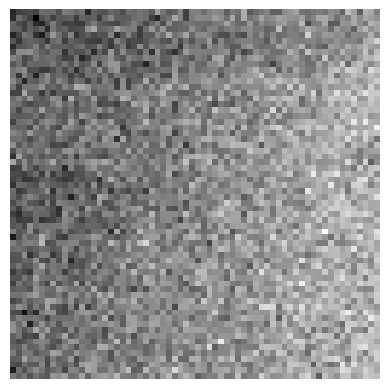

In [83]:
hidden_state = torch.load(file_list[6])  # Step 10
for i in tqdm(range (100,120)):
	hidden_state_img = hidden_state[0][:,i].reshape((64,64))
	plt.imshow(hidden_state_img, cmap='gray')
	plt.axis('off')
	plt.savefig(f'../../output/images/hs_{i}.png')


  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:02<00:00,  6.82it/s]


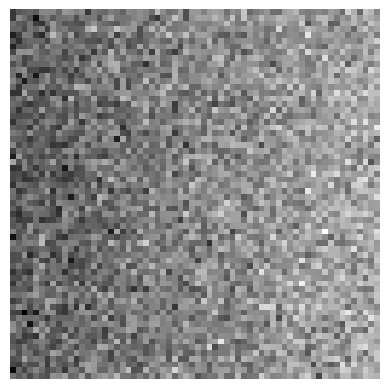

In [85]:
hidden_state = torch.load(file_list[2])  # Step 28
for i in tqdm(range (100,120)):
	hidden_state_img = hidden_state[0][:,i].reshape((64,64))
	plt.imshow(hidden_state_img, cmap='gray')
	plt.axis('off')
	plt.savefig(f'../../output/images/hs_{i}.png')

In [ ]:
hidden_state = torch.load(file_list[1])  # Step 0
for i in tqdm(range (100,120)):
	hidden_state_img = hidden_state[0][:,i].reshape((64,64))
	plt.imshow(hidden_state_img, cmap='gray')
	plt.axis('off')
	plt.savefig(f'../../output/images/hs_{i}.png')

### Probability with binomial distibution
This part is to plot a graph to show independent likelihoods of determinism in stable diffusion and llama models.

In [1]:
import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

# Calculate posterior probability
def calcP(p, maj=0.5):
	dict = {}
	
	for n in range(3,27,2):
		k = math.ceil(n*maj)
		P = 1 - stats.binom.cdf(k-1, n, p)
		dict[n]=P
	
	return dict

In [2]:
# Compute probability of 100% hash match
path_to_sim_sd3= '/home/ms5267/blockentropy/output/hash_similarities.txt'
data = np.loadtxt(path_to_sim_sd3)

p = np.sum(data==1.0)/len(data)

print(f"Probability of 100% hash match: {p}")
super_maj_P_sd3 = calcP(p, 2.1/3)
maj_P_sd3= calcP(p)

Probability of 100% hash match: 0.9732142857142857


In [3]:
# Compute probability of 100% hash match
path_to_sim_sd3= '/home/ms5267/blockentropy/output/sim_score_llama.txt'
data = np.loadtxt(path_to_sim_sd3)

p = np.sum(data==1.0)/len(data)

print(f"Probability of 100% hash match: {p}")
super_maj_P_llama = calcP(p, 2.1/3)
maj_P_llama= calcP(p)

Probability of 100% hash match: 0.9891666666666666


In [4]:
maj_P_llama ,super_maj_P_llama

({3: 0.9996504594907407,
  5: 0.9999874915887996,
  7: 0.9999995303441357,
  9: 0.9999999818685229,
  11: 0.999999999287205,
  13: 0.999999999971618,
  15: 0.9999999999988591,
  17: 0.9999999999999538,
  19: 0.9999999999999981,
  21: 0.9999999999999999,
  23: 1.0,
  25: 1.0},
 {3: 0.9678508119212962,
  5: 0.9988516111220309,
  7: 0.9999569281217818,
  9: 0.9998982963635773,
  11: 0.9999957230963606,
  13: 0.9999908928632334,
  15: 0.9999995907136698,
  17: 0.9999999819436668,
  19: 0.9999999611450487,
  21: 0.9999999982176697,
  23: 0.9999999963129994,
  25: 0.999999999825906})

In [15]:
def plot(majority_sd3, super_majority_sd3, majority_llama, super_majority_llama):
    """
    Creates a single line plot of hash probabilities for SD3 and LLaMA, including both majority and super-majority data.
    
    Args:
    majority_sd3 (dict): Data for simple majority in SD3
    super_majority_sd3 (dict): Data for super majority in SD3
    majority_llama (dict): Data for simple majority in LLaMA
    super_majority_llama (dict): Data for super majority in LLaMA
    """
    # Set up a color palette
    colors = {
        'SD3 Majority': '#4682B4',  # Steel Blue
        'SD3 Super Majority': '#20B2AA',  # Light Sea Green
        'LLaMA Majority': '#FFA07A',  # Light Salmon
        'LLaMA Super Majority': '#FF6347'  # Tomato
    }
    alpha = 0.85  # Transparency level

    # Create the plot
    plt.figure(figsize=(12, 7))

    # Plot data
    plt.plot(list(majority_sd3.keys()), list(majority_sd3.values()), color=colors['SD3 Majority'], alpha=alpha,
             marker='o', label='Simple Majority (SD3)', linewidth=2)
    plt.plot(list(super_majority_sd3.keys()), list(super_majority_sd3.values()), color=colors['SD3 Super Majority'], alpha=alpha,
             marker='s', label='2/3 Super Majority (SD3)', linewidth=2)
    plt.plot(list(majority_llama.keys()), list(majority_llama.values()), color=colors['LLaMA Majority'], alpha=alpha,
             marker='^', label='Simple Majority (Llama)', linewidth=2)
    plt.plot(list(super_majority_llama.keys()), list(super_majority_llama.values()), color=colors['LLaMA Super Majority'], alpha=alpha,
             marker='D', label='2/3 Super Majority (Llama)', linewidth=2)

    # Customize the plot
    plt.title('Average Hash Probability of Verification (t=0)', fontsize=16)
    plt.xlabel('Number of Independent Verifiers', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5, color='#cccccc')
    plt.legend(fontsize=14, loc='lower right')

    # Set y-axis to start from 0.9
    plt.ylim(0.91, 1.005)

    # Set X-axis to start at 2 and have ticks at 5-interval multiples
    x_values = list(majority_sd3.keys()) + list(majority_llama.keys())
    x_min = 2
    x_max = max(x_values)
    plt.xlim(x_min, x_max+1)
    tick_start = 5 * ((x_min - 1) // 5 + 1)  # First multiple of 5 after x_min
    plt.xticks(np.arange(tick_start, x_max+1, 5))

    # Format y-axis ticks to show 3 decimal places
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.3f}"))

    # Set background color
    plt.gca().set_facecolor('#f8f8f8')  # Lighter background for better contrast

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

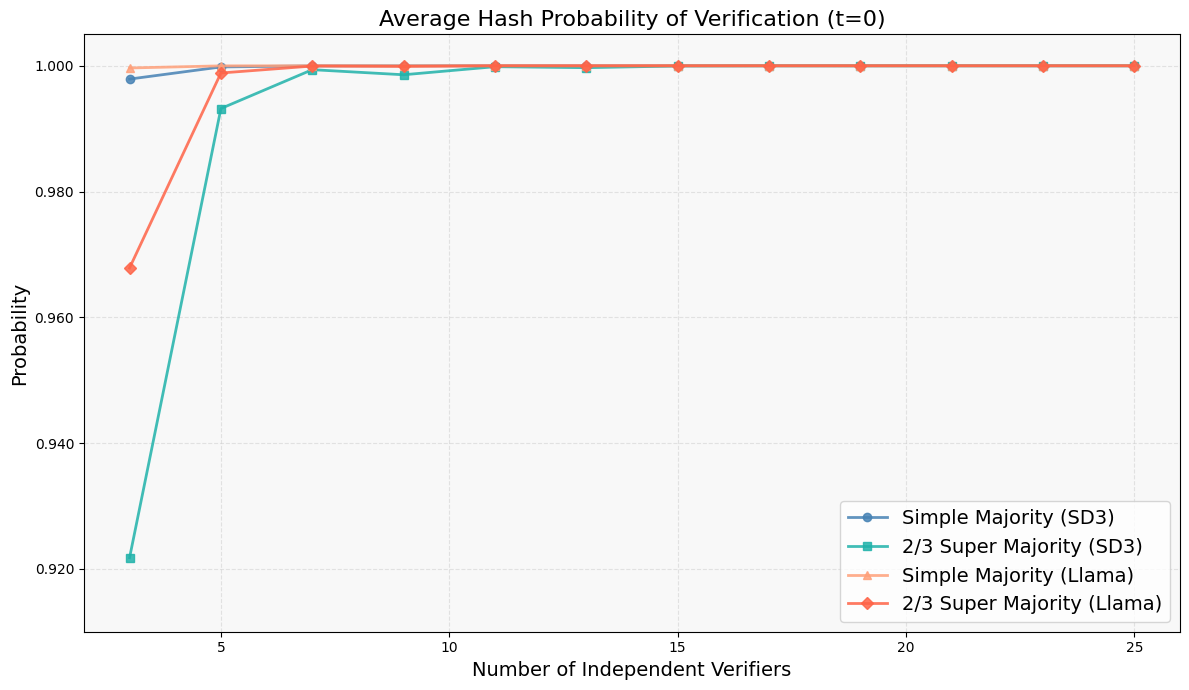

In [16]:
plot(maj_P_sd3, super_maj_P_sd3,maj_P_llama, super_maj_P_llama)

In [64]:
def plot(majority, super_majority):
    """
    Creates a line plot of hash probabilities.
    
    Args:
    majority (dict): Data for simple majority
    super_majority (dict): Data for super majority
    """
    # Set up a mellow color palette with transparency
    color1 = '#4682B4'  # Steel blue, more mellow
    color2 = '#F4A460'  # Sandy brown, more mellow
    alpha = 0.85  # Transparency level

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot Majority data
    plt.plot(list(majority.keys()), list(majority.values()), color=color1, alpha=alpha,
             marker='o', label='Simple Majority (t=0)', linewidth=2)

    # Plot Super Majority data
    plt.plot(list(super_majority.keys()), list(super_majority.values()), color=color2, alpha=alpha,
             marker='s', label='2/3 Super Majority (t=0)', linewidth=2)

    # Customize the plot
    plt.title('Average Hash Probability of Verification', fontsize=16)
    plt.xlabel('Number of Independent Verifiers', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5, color='#cccccc')
    plt.legend(fontsize=10, loc='lower right')

    # Set y-axis to start from 0.9
    plt.ylim(0.91, 1.005)

    # Set X-axis to start at 2 and have ticks at 5-interval multiples
    x_values = list(majority.keys())
    x_min = 2
    x_max = max(x_values)
    plt.xlim(x_min, x_max+1)
    tick_start = 5 * ((x_min - 1) // 5 + 1)  # First multiple of 5 after x_min
    plt.xticks(np.arange(tick_start, x_max+1 , 5))

    # Format y-axis ticks to show 3 decimal places
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.3f}"))

    # Set background color
    plt.gca().set_facecolor('#f8f8f8')  # Lighter background for better contrast

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

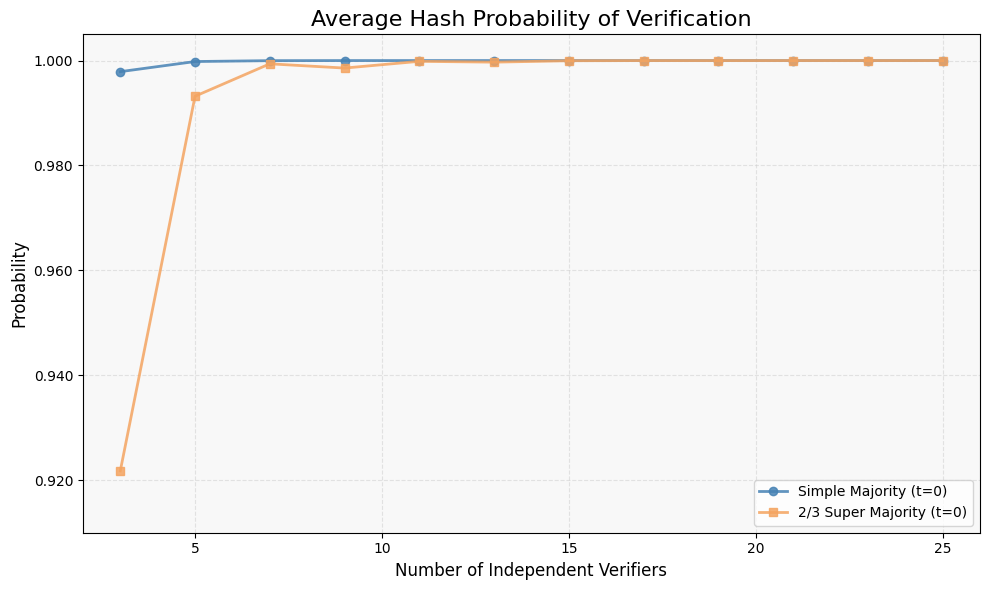

In [65]:
plot(maj_P, super_maj_P,)

In [68]:
super_maj_P

{3: 0.9217760625455539,
 5: 0.9932019500450978,
 7: 0.9993797068358308,
 9: 0.9985701461862877,
 11: 0.9998539645758849,
 13: 0.9996969128557216,
 15: 0.9999669381579785,
 17: 0.9999964574348863,
 19: 0.9999925841264303,
 21: 0.9999991739704897,
 23: 0.9999983386799262,
 25: 0.9999998095337959}